## Homework 6

### Подготовка

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [7]:
def bias(z, y):
    return 2 * (z - y)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [13]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [22]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')

### 1. Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

Ошибка алгоритма из 25 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 2768
Ошибка алгоритма из 25 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 2810
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2026
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 3015
Ошибка алгоритма из 25 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1356
Ошибка алгоритма из 25 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3210
Ошибка алгоритма из 25 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 273
Ошибка алгоритма из 25 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3866
Ошибка алгоритма из 25 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 29
Ошибка алгоритма из 25 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3815
Ошибка алгоритма из 25 деревьев глубиной 10     с шагом 0.1 на тренировочной выборке: 1
Ошибка алгоритма из 25 деревьев глубиной

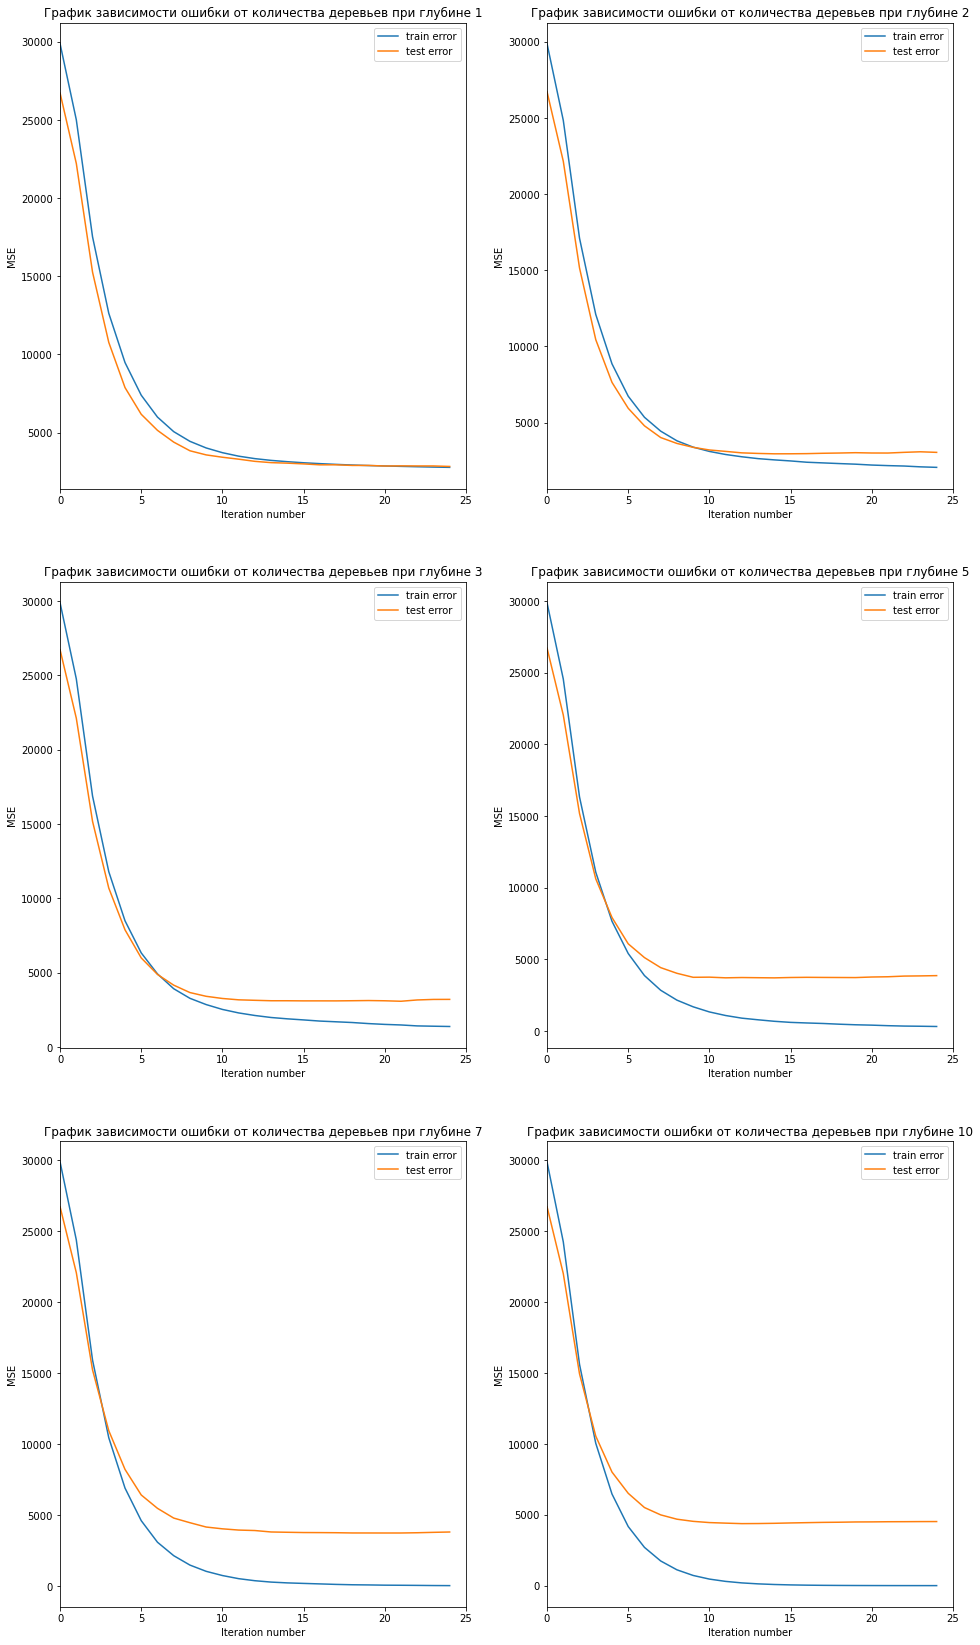

In [23]:
eta = 0.1
n_trees = 25
coefs = [1] * n_trees
depth_list = [1, 2, 3, 5, 7, 10]
plt.figure(figsize = (16, 60))
for idx, depth in enumerate(depth_list, 1):
    trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    plt.subplot(len(depth_list), 2, idx)
    plt.title(f'График зависимости ошибки от количества деревьев при глубине {depth}')
    get_error_plot(n_trees, train_errors, test_errors)

Минимальная ошибка на тестовой выборке достигается при глубине = 1, при этом требуется большее число деревьев. По мере увеличения глубины минимальная ошибка на тестовой выборке достигается на меньшем числе деревьев, однако сама финальная ошибка на тестовой выборке увеличивается по мере увеличения глубины, а на тренировочной, наоборот, снижается, что может свидетельствовать о переобучении.

Таким образом, оптимальными представляются модели для деревьев небольшой (вплоть до единичной) глубины.

### 2. (*) Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [44]:
def sgb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta, sgb_subsample=0.5):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # алгоритмы начиная со второго обучаем на сдвиг на подвыборке
            subsample_indexes = np.random.choice(range(len(X_train)), int(len(X_train) * sgb_subsample), replace=False)
            # Получим ответы на текущей композиции
            target = gb_predict(X_train[subsample_indexes], trees, coefs, eta)
            tree.fit(X_train[subsample_indexes], bias(y_train[subsample_indexes], target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

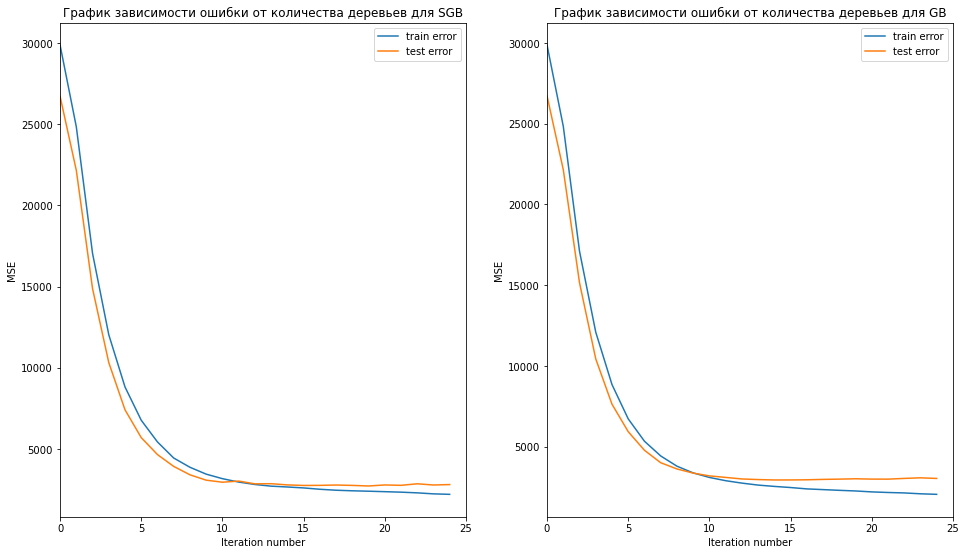

In [54]:
eta = 0.1
n_trees = 25
coefs = [1] * n_trees
depth = 2
trees_sgb, train_errors_sgb, test_errors_sgb = sgb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
plt.figure(figsize = (16, 20))
plt.subplot(2, 2, 1)
plt.title(f'График зависимости ошибки от количества деревьев для SGB')
get_error_plot(n_trees, train_errors_sgb, test_errors_sgb)
plt.subplot(2, 2, 2)
plt.title(f'График зависимости ошибки от количества деревьев для GB')
get_error_plot(n_trees, train_errors, test_errors)

In [55]:
print(f'Результаты для SGB')
evaluate_alg(X_train, X_test, y_train, y_test, trees_sgb, coefs, eta)
print(f'Результаты для GB')
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Результаты для SGB
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2166
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 2775
Результаты для GB
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2026
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 3015


**Заметно, что результаты практически идентичны, при этом для стохастического градиентного бустинга в конкретном случае они даже немного лучше.**

### 3. (*) Модифицировать алгоритм градиетного бустинга, взяв за основу реализацию решающего дерева из ДЗ_4. Сделать выводы о качестве алгоритма по сравнению с реализацией из п.1.

In [58]:
# Реализуем класс узла

class Node:
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле

In [59]:
# И класс терминального узла (листа)

class Leaf:
    
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.prediction = self.predict()
        
    def predict(self):
        return self.labels.mean()      

In [60]:
# Расчет качества

def quality(left_labels, right_labels, current_dispersion):

    # доля выбоки, ушедшая в левое поддерево
    p = float(left_labels.shape[0]) / (left_labels.shape[0] + right_labels.shape[0])
    
    return current_dispersion - p * left_labels.var() - (1 - p) * right_labels.var()

In [61]:
# Разбиение датасета в узле

def split(data, labels, index, t):
    
    left = np.where(data[:, index] <= t)
    right = np.where(data[:, index] > t)
        
    true_data = data[left]
    false_data = data[right]
    true_labels = labels[left]
    false_labels = labels[right]
        
    return true_data, false_data, true_labels, false_labels

In [102]:
# Нахождение наилучшего разбиения

def find_best_split(data, labels):
    
    #  обозначим минимальное количество объектов в узле
    min_leaf = 5

    current_dispersion = labels.var()

    best_quality = 0
    best_t = None
    best_index = None
    
    n_features = data.shape[1]
    
    for index in range(n_features):
        # будем проверять только уникальные значения признака, исключая повторения
        t_values = np.unique([row[index] for row in data])
        
        for t in t_values:
            true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
            #  пропускаем разбиения, в которых в узле остается менее 5 объектов
            if len(true_data) < min_leaf or len(false_data) < min_leaf:
                continue
            
            current_quality = quality(true_labels, false_labels, current_dispersion)
            
            #  выбираем порог, на котором получается максимальный прирост качества
            if current_quality > best_quality:
                best_quality, best_t, best_index = current_quality, t, index

    return best_quality, best_t, best_index

In [103]:
# Построение дерева с помощью рекурсивной функции

def build_tree(data, labels, max_depth=2, inv=0):

    quality, t, index = find_best_split(data, labels)
    
    #  Базовый случай - прекращаем рекурсию, когда нет прироста в качестве
    if quality == 0 or inv == max_depth:
        return Leaf(data, labels)

    true_data, false_data, true_labels, false_labels = split(data, labels, index, t)
    
    # счетчик вызовов функции
    inv += 1
        
    # Рекурсивно строим два поддерева
    true_branch = build_tree(true_data, true_labels, max_depth=max_depth, inv=inv)
    false_branch = build_tree(false_data, false_labels, max_depth=max_depth, inv=inv)

    # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
    return Node(index, t, true_branch, false_branch)

In [104]:
def classify_object(obj, node):

    #  Останавливаем рекурсию, если достигли листа
    if isinstance(node, Leaf):
        answer = node.prediction
        return answer

    if obj[node.index] <= node.t:
        return classify_object(obj, node.true_branch)
    else:
        return classify_object(obj, node.false_branch)

In [105]:
def predict(data, tree):
    
    targets = []
    for obj in data:
        prediction = classify_object(obj, tree)
        targets.append(prediction)
    return targets

In [106]:
def manual_gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании 
    # прибавляются с шагом eta
    return np.array([sum([
        eta * coef * predict([x], alg)[0] for alg, coef in zip(trees_list, coef_list)]) 
                     for x in X])

In [107]:
def gb_fit_manual(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # eta - скорость обучения
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree = build_tree(X_train, y_train, max_depth=max_depth)
            
            train_errors.append(mean_squared_error(y_train, manual_gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, manual_gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = manual_gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree = build_tree(X_train, bias(y_train, target), max_depth=max_depth)
            
            train_errors.append(mean_squared_error(y_train, manual_gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, manual_gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

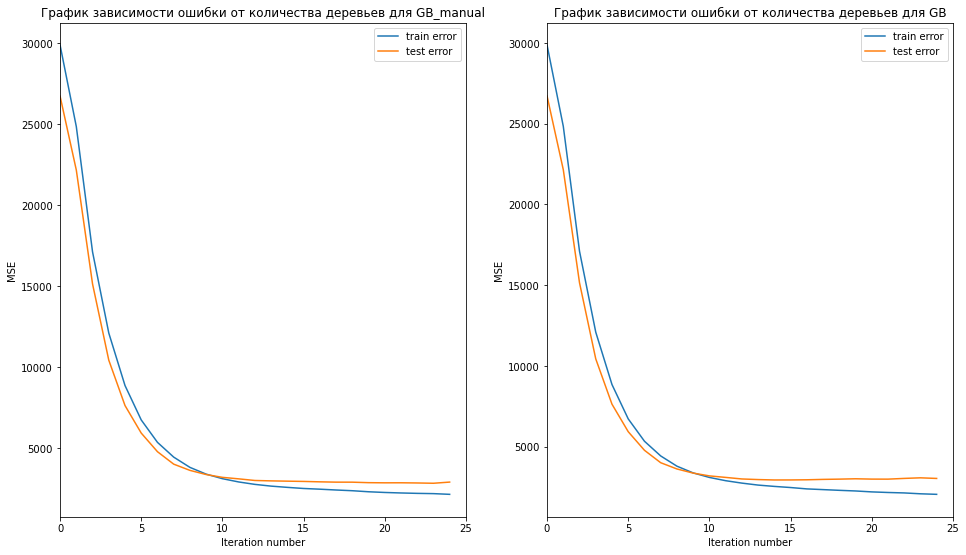

In [108]:
eta = 0.1
n_trees = 25
coefs = [1] * n_trees
max_depth = 2
trees_mgb, train_errors_mgb, test_errors_mgb = gb_fit_manual(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
plt.figure(figsize = (16, 20))
plt.subplot(2, 2, 1)
plt.title(f'График зависимости ошибки от количества деревьев для GB_manual')
get_error_plot(n_trees, train_errors_mgb, test_errors_mgb)
plt.subplot(2, 2, 2)
plt.title(f'График зависимости ошибки от количества деревьев для GB')
get_error_plot(n_trees, train_errors, test_errors)

In [112]:
def evaluate_alg_manual(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = manual_gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тренировочной выборке: {round(mean_squared_error(y_train, train_prediction))}')

    test_prediction = manual_gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тестовой выборке: {round(mean_squared_error(y_test, test_prediction))}')

In [113]:
print(f'Результаты для GB_manual')
evaluate_alg_manual(X_train, X_test, y_train, y_test, trees_mgb, coefs, eta)
print(f'Результаты для GB')
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Результаты для GB_manual
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2126
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 2914
Результаты для GB
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 2026
Ошибка алгоритма из 25 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 3015


**Ошибки практически идентичны.**